# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import optuna

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Preprocessing

In [2]:
df = pd.read_csv('~/DS_bootcamp/stavki/data/ratings/international_matches.csv')
df['date'] = pd.to_datetime(df.date)
df.index = df['date']

In [3]:
df.loc[df.home_team.str.contains('China'), 'home_team'] = 'China'
df.loc[df.away_team.str.contains('China'), 'away_team'] = 'China'
df.loc[df.home_team.str.contains('Curaçao'), 'home_team'] = 'Curacao'
df.loc[df.away_team.str.contains('Curaçao'), 'away_team'] = 'Curacao'
df.loc[df.home_team.str.contains('Congo'), 'home_team'] = 'Congo'
df.loc[df.away_team.str.contains('Congo'), 'away_team'] = 'Congo'
df.loc[df.home_team.str.contains('German'), 'home_team'] = 'Germany'
df.loc[df.away_team.str.contains('German'), 'away_team'] = 'Germany'
df.loc[df.home_team.str.contains('Yemen'), 'home_team'] = 'Yemen'
df.loc[df.away_team.str.contains('Yemen'), 'away_team'] = 'Yemen'
df.loc[df.home_team.str.contains('Vietnam'), 'home_team'] = 'Vietnam'
df.loc[df.away_team.str.contains('Vietnam'), 'away_team'] = 'Vietnam'
df.loc[df.home_team.str.contains('Sint Maarten'), 'home_team'] = 'Saint Martin'
df.loc[df.away_team.str.contains('Sint Maarten'), 'away_team'] = 'Saint Martin'
df.loc[df.home_team.str.contains('São Tomé and Príncipe'), 'home_team'] = 'Sao Tome e Principe'
df.loc[df.away_team.str.contains('São Tomé and Príncipe'), 'away_team'] = 'Sao Tome e Principe'
df.home_team = df.home_team.replace('United States Virgin Islands', 'US Virgin Islands')
df.away_team = df.away_team.replace('United States Virgin Islands', 'US Virgin Islands')
df.home_team = df.home_team.replace('United States', 'USA')
df.away_team = df.away_team.replace('United States', 'USA')
df.loc[df.home_team.str.contains('Brunei'), 'home_team'] = 'Brunei'
df.loc[df.away_team.str.contains('Brunei'), 'away_team'] = 'Brunei'
df.loc[df.home_team.str.contains('Cabo'), 'home_team'] = 'Cape Verde'
df.loc[df.away_team.str.contains('Cabo'), 'away_team'] = 'Cape Verde'
df.loc[df.home_team.str.contains('Cape'), 'home_team'] = 'Cape Verde'
df.loc[df.away_team.str.contains('Cape'), 'away_team'] = 'Cape Verde'
df.loc[df.home_team.str.contains('Curaçao'), 'home_team'] = 'Curacao'
df.loc[df.away_team.str.contains('Curaçao'), 'away_team'] = 'Curacao'
df.loc[df.home_team.str.contains('Iran'), 'home_team'] = 'Iran'
df.loc[df.away_team.str.contains('Iran'), 'away_team'] = 'Iran'
df.loc[df.home_team.str.contains('Chinese Taipei'), 'home_team'] = 'China'
df.loc[df.away_team.str.contains('Chinese Taipei'), 'away_team'] = 'China'
df.loc[df.home_team.str.contains('China PR'), 'home_team'] = 'China'
df.loc[df.away_team.str.contains('China PR'), 'away_team'] = 'China'
df.loc[df.home_team.str.contains('Congo DR'), 'home_team'] = 'Congo'
df.loc[df.away_team.str.contains('Congo DR'), 'away_team'] = 'Congo'
df.loc[df.home_team.str.contains('Türkiye'), 'home_team'] = 'Turkey'
df.loc[df.away_team.str.contains('Türkiye'), 'away_team'] = 'Turkey'
df.loc[df.home_team.str.contains('Tomé'), 'home_team'] = 'Sao Tome e Principe'
df.loc[df.away_team.str.contains('Tomé'), 'away_team'] = 'Sao Tome e Principe'
df.loc[df.home_team.str.contains('Korea Republic'), 'home_team'] = 'South Korea'
df.loc[df.away_team.str.contains('Korea Republic'), 'away_team'] = 'South Korea'
df.loc[df.home_team.str.contains('Korea DPR'), 'home_team'] = 'North Korea'
df.loc[df.away_team.str.contains('Korea DPR'), 'away_team'] = 'North Korea'
df.loc[df.home_team.str.contains('Kyrgyz Republic'), 'home_team'] = 'Kyrgyzstan'
df.loc[df.away_team.str.contains('Kyrgyz Republic'), 'away_team'] = 'Kyrgyzstan'
df.loc[df.home_team.str.contains('Netherlands'), 'home_team'] = 'Netherlands'
df.loc[df.away_team.str.contains('Netherlands'), 'away_team'] = 'Netherlands'
df.loc[df.home_team.str.contains('Macedonia'), 'home_team'] = 'North Macedonia'
df.loc[df.away_team.str.contains('Macedonia'), 'away_team'] = 'North Macedonia'
df.loc[df.home_team.str.contains('Zaire'), 'home_team'] = 'Congo'
df.loc[df.away_team.str.contains('Zaire'), 'away_team'] = 'Congo'
df.loc[df.home_team.str.contains('Vincent / Grenadines'), 'home_team'] = 'Saint Vincent and the Grenadines'
df.loc[df.away_team.str.contains('Vincent / Grenadines'), 'away_team'] = 'Saint Vincent and the Grenadines'
df['home_team'] = df['home_team'].str.replace('St.', 'Saint', regex=True)
df['away_team'] = df['away_team'].str.replace('St.', 'Saint', regex=True)

In [4]:
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
date,,,,,,,,,,,,,,,,,,,,,
2022-06-14,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-14,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-14,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
2022-06-14,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
2022-06-14,2022-06-14,South Korea,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [5]:
home_continent = pd.get_dummies(df.home_team_continent, prefix='home_')
away_continent = pd.get_dummies(df.away_team_continent, prefix='away_')
df = pd.concat([df, home_continent, away_continent], axis=1)

df['dif_rank'] = df.home_team_fifa_rank-df.away_team_fifa_rank
df['dif_points'] = df.home_team_total_fifa_points-df.away_team_total_fifa_points
df['dif_goalkeeper'] = df.home_team_goalkeeper_score-df.away_team_goalkeeper_score
df['dif_defense'] = df.home_team_mean_defense_score-df.away_team_mean_defense_score
df['dif_offense'] = df.home_team_mean_offense_score-df.away_team_mean_offense_score
df['dif_midfield'] = df.home_team_mean_midfield_score-df.away_team_mean_midfield_score

df['ave_rank'] = (df.home_team_fifa_rank+df.away_team_fifa_rank)/2
df['ave_points'] = (df.home_team_total_fifa_points+df.away_team_total_fifa_points)/2
df['ave_goalkeeper'] = (df.home_team_goalkeeper_score+df.away_team_goalkeeper_score)/2
df['ave_defense'] = (df.home_team_mean_defense_score+df.away_team_mean_defense_score)/2
df['ave_offense'] = (df.home_team_mean_offense_score+df.away_team_mean_offense_score)/2
df['ave_midfield'] = (df.home_team_mean_midfield_score+df.away_team_mean_midfield_score)/2

df['home_result'] = df.home_team_result
df['neutral_location'] = df.neutral_location.map({False:0, True:1})
df['shoot_out'] = df.shoot_out.map({'No':0, 'Yes':1})
df['date']=df.date.dt.year
df = df.fillna(0)

In [6]:
df_2 = df.copy()

In [7]:
df = df.drop(['home_team_result', 'home_team_score', 'away_team_score',
              'home_team_continent', 'away_team_continent',
              'home_team', 'away_team', 'tournament', 'city', 'country'], axis=1)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23921 entries, 1993-08-08 to 2022-06-14
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  int64  
 1   home_team_fifa_rank            23921 non-null  int64  
 2   away_team_fifa_rank            23921 non-null  int64  
 3   home_team_total_fifa_points    23921 non-null  int64  
 4   away_team_total_fifa_points    23921 non-null  int64  
 5   neutral_location               23921 non-null  int64  
 6   shoot_out                      23921 non-null  int64  
 7   home_team_goalkeeper_score     23921 non-null  float64
 8   away_team_goalkeeper_score     23921 non-null  float64
 9   home_team_mean_defense_score   23921 non-null  float64
 10  home_team_mean_offense_score   23921 non-null  float64
 11  home_team_mean_midfield_score  23921 non-null  float64
 12  away_team_mean_defense_score 

In [8]:
df.tail()

,date,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,neutral_location,shoot_out,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,...,dif_defense,dif_offense,dif_midfield,ave_rank,ave_points,ave_goalkeeper,ave_defense,ave_offense,ave_midfield,home_result
date,,,,,,,,,,,,,,,,,,,,,
2022-06-14,2022,180,153,932,1040,0,0,65.0,0.0,0.0,...,0.0,0.0,0.0,166.5,986.0,0.0,0.0,0.00,0.00,Win
2022-06-14,2022,192,135,895,1105,0,0,0.0,65.0,0.0,...,0.0,0.0,0.0,163.5,1000.0,0.0,0.0,0.00,0.00,Lose
2022-06-14,2022,28,60,1526,1387,1,1,79.0,74.0,75.5,...,0.0,0.7,0.0,44.0,1456.5,76.5,75.5,76.35,78.20,Lose
2022-06-14,2022,23,35,1553,1499,0,0,73.0,0.0,75.2,...,4.4,2.7,3.5,29.0,1526.0,0.0,73.0,73.65,75.75,Lose
2022-06-14,2022,29,32,1519,1500,0,0,75.0,0.0,73.0,...,0.0,0.7,3.0,30.5,1509.5,0.0,0.0,79.65,72.30,Win


# Modeling

In [9]:
df['home_result']

date
1993-08-08     Win
1993-08-08    Draw
1993-08-08     Win
1993-08-08     Win
1993-08-08    Lose
              ... 
2022-06-14     Win
2022-06-14    Lose
2022-06-14    Lose
2022-06-14    Lose
2022-06-14     Win
Name: home_result, Length: 23921, dtype: object

In [10]:
X = df.drop('home_result', axis=1)
y = df['home_result'].map({'Lose':0, 'Draw':1, 'Win':2})
scaler = RobustScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LogisticRegression

In [11]:
# def objective(trial):
#     param_grid = {
#         'n_jobs': 10,
#         'multi_class': 'multinomial',
#         'fit_intercept': True,
#         'max_iter': trial.suggest_int('max_iter', 100, 500),
#         'warm_start': trial.suggest_categorical('warm_start', [True, False]),
#     }
    
#     model = LogisticRegression(**param_grid)
#     model.fit(X_train, y_train)
    
#     return accuracy_score(y_test, model.predict(X_test))

# study_lr = optuna.create_study(direction='maximize')
# study_lr.optimize(objective, n_trials=10)

In [12]:
lm = LogisticRegression(multi_class='multinomial', 
                        n_jobs=4, 
                        fit_intercept=True,
                        solver='newton-cg',
                        max_iter=100,
                        warm_start=True)

In [13]:
lm.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', n_jobs=4, solver='newton-cg',
                   warm_start=True)

In [14]:
print(classification_report(y_test, lm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1345
           1       0.28      0.01      0.01      1068
           2       0.61      0.85      0.71      2372

    accuracy                           0.58      4785
   macro avg       0.47      0.48      0.42      4785
weighted avg       0.51      0.58      0.51      4785



AttributeError: module 'matplotlib.pyplot' has no attribute 'set'

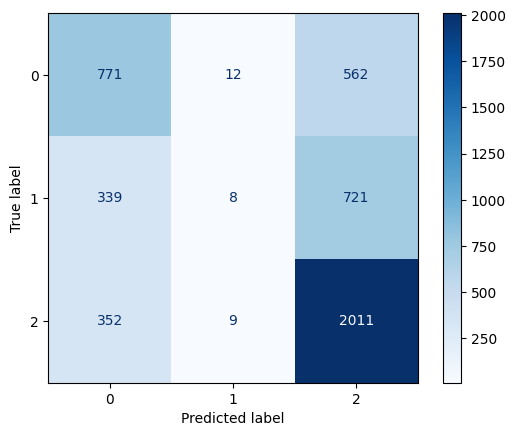

In [100]:
plot_confusion_matrix(lm, X_test, y_test, cmap='Blues')
plt.show()

# KNN

In [16]:
def objective(trial):
    params = {'n_neighbors': trial.suggest_int('n_neighbors', 1, 10),
              'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
              'n_jobs': 10}
    
    model = KNeighborsClassifier(**params)
    model.fit(X_train, y_train)
    
    return accuracy_score(y_test, model.predict(X_test))

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective, n_trials=20)

[I 2022-11-17 03:31:44,249] A new study created in memory with name: no-name-4b2e5cdf-9c02-4ac1-9e57-ca6fc1827386
[I 2022-11-17 03:31:44,383] Trial 0 finished with value: 0.503239289446186 and parameters: {'n_neighbors': 3, 'algorithm': 'auto'}. Best is trial 0 with value: 0.503239289446186.
[I 2022-11-17 03:31:44,504] Trial 1 finished with value: 0.503239289446186 and parameters: {'n_neighbors': 3, 'algorithm': 'auto'}. Best is trial 0 with value: 0.503239289446186.
[I 2022-11-17 03:31:44,631] Trial 2 finished with value: 0.5074190177638453 and parameters: {'n_neighbors': 4, 'algorithm': 'brute'}. Best is trial 2 with value: 0.5074190177638453.
[I 2022-11-17 03:31:44,755] Trial 3 finished with value: 0.5352142110762801 and parameters: {'n_neighbors': 7, 'algorithm': 'brute'}. Best is trial 3 with value: 0.5352142110762801.
[I 2022-11-17 03:31:44,878] Trial 4 finished with value: 0.5396029258098224 and parameters: {'n_neighbors': 8, 'algorithm': 'brute'}. Best is trial 4 with value: 0.

In [17]:
knn = KNeighborsClassifier(**study_knn.best_params)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10)

In [18]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52      1345
           1       0.30      0.15      0.20      1068
           2       0.64      0.74      0.68      2372

    accuracy                           0.55      4785
   macro avg       0.48      0.48      0.47      4785
weighted avg       0.52      0.55      0.53      4785



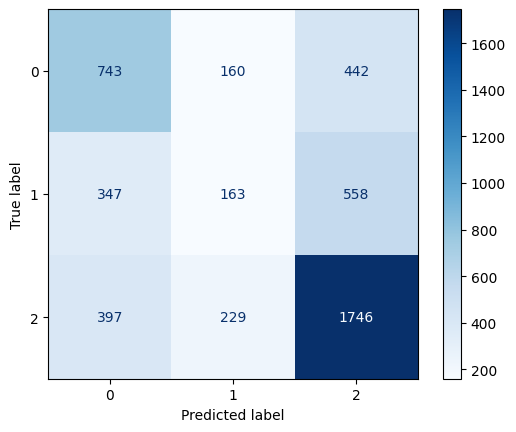

In [19]:
plot_confusion_matrix(knn, X_test, y_test, cmap='Blues')  
plt.show()

# Random forest

In [20]:
def objective(trial):
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'n_jobs': 10,
        'random_state': 42,
        'warm_start': trial.suggest_categorical('warm_start', [True, False]),
    }
    
    model = RandomForestClassifier(**param_grid)
    model.fit(X_train, y_train)
    
    return accuracy_score(y_test, model.predict(X_test))

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=10)

[I 2022-11-17 03:31:53,030] A new study created in memory with name: no-name-4e297212-7d2a-4ef0-9b18-6ece61b1da73
[I 2022-11-17 03:31:54,304] Trial 0 finished with value: 0.5791013584117033 and parameters: {'n_estimators': 621, 'criterion': 'entropy', 'max_depth': 5, 'warm_start': False}. Best is trial 0 with value: 0.5791013584117033.
[I 2022-11-17 03:31:55,936] Trial 1 finished with value: 0.5853709508881922 and parameters: {'n_estimators': 606, 'criterion': 'log_loss', 'max_depth': 8, 'warm_start': False}. Best is trial 1 with value: 0.5853709508881922.
[I 2022-11-17 03:31:58,089] Trial 2 finished with value: 0.5859979101358411 and parameters: {'n_estimators': 696, 'criterion': 'log_loss', 'max_depth': 10, 'warm_start': True}. Best is trial 2 with value: 0.5859979101358411.
[I 2022-11-17 03:31:58,362] Trial 3 finished with value: 0.5851619644723093 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 8, 'warm_start': False}. Best is trial 2 with value: 0.585997910

In [21]:
rf = RandomForestClassifier(**study_rf.best_params, n_jobs=10, random_state=42)

In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=10, n_estimators=696,
                       n_jobs=10, random_state=42, warm_start=True)

In [23]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1345
           1       0.27      0.00      0.01      1068
           2       0.61      0.86      0.71      2372

    accuracy                           0.59      4785
   macro avg       0.47      0.48      0.42      4785
weighted avg       0.51      0.59      0.51      4785



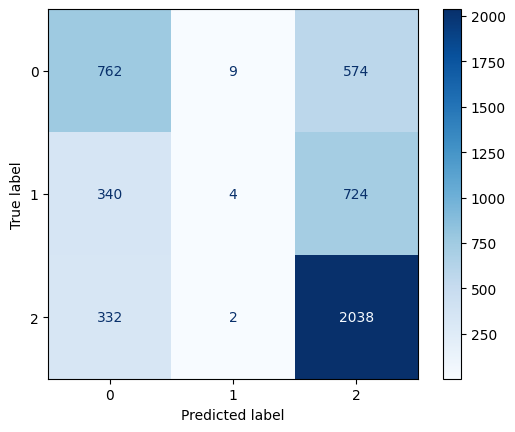

In [24]:
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues')  
plt.show()

# Gradient Boosting

In [25]:
def objective(trial):
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'min_samples_split': trial.suggest_int('min_samples_split', 4, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 5),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'criterion': trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error', 'mse']),
    }
    
    model = GradientBoostingClassifier(**param_grid)
    model.fit(X_train, y_train)
    
    return accuracy_score(y_test, model.predict(X_test))

study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective, n_trials=10)

[I 2022-11-17 03:32:11,295] A new study created in memory with name: no-name-1b0d8586-cf04-4843-8738-210b5d7332ce
[I 2022-11-17 03:32:46,925] Trial 0 finished with value: 0.5784743991640543 and parameters: {'n_estimators': 137, 'learning_rate': 0.06415058286117609, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_depth': 8, 'max_features': 'auto', 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.5784743991640543.
[I 2022-11-17 03:32:50,967] Trial 1 finished with value: 0.5868338557993731 and parameters: {'n_estimators': 136, 'learning_rate': 0.037622662137699284, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 5, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 1 with value: 0.5868338557993731.
[I 2022-11-17 03:33:05,769] Trial 2 finished with value: 0.5711598746081504 and parameters: {'n_estimators': 244, 'learning_rate': 0.08775998953317081, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 9, 'max_features': 'sqrt', 'criterion'

In [26]:
gb = GradientBoostingClassifier(**study_gb.best_params)

In [27]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error',
                           learning_rate=0.037622662137699284, max_depth=5,
                           max_features='log2', min_samples_leaf=2,
                           min_samples_split=7, n_estimators=136)

In [28]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1345
           1       0.17      0.00      0.01      1068
           2       0.61      0.85      0.71      2372

    accuracy                           0.59      4785
   macro avg       0.44      0.48      0.42      4785
weighted avg       0.49      0.59      0.51      4785



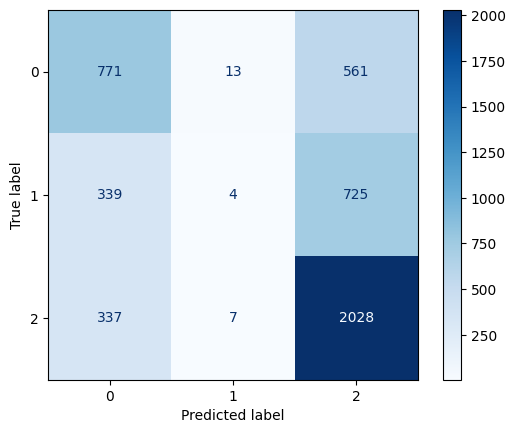

In [29]:
plot_confusion_matrix(gb, X_test, y_test, cmap='Blues')  
plt.show()

# LGBMClassifier

In [30]:
def objective(trial):
    param_grid = {'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
                  'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.1),
                  'num_leaves': trial.suggest_int('num_leaves', 3, 50),
                 }

    model = LGBMClassifier(**param_grid, random_state=42, n_jobs=2)
    model.fit(X_train, y_train)
    
    return accuracy_score(y_test, model.predict(X_test))

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective, n_trials=20)

[I 2022-11-17 03:34:42,788] A new study created in memory with name: no-name-916b35d1-8e9b-4264-84a3-58780b49d93b
[I 2022-11-17 03:34:45,418] Trial 0 finished with value: 0.5755485893416928 and parameters: {'n_estimators': 925, 'learning_rate': 0.0788686284159349, 'num_leaves': 13}. Best is trial 0 with value: 0.5755485893416928.
[I 2022-11-17 03:34:46,910] Trial 1 finished with value: 0.5845350052246604 and parameters: {'n_estimators': 565, 'learning_rate': 0.04651108763751568, 'num_leaves': 10}. Best is trial 1 with value: 0.5845350052246604.
[I 2022-11-17 03:34:50,619] Trial 2 finished with value: 0.5686520376175549 and parameters: {'n_estimators': 632, 'learning_rate': 0.06177830338502405, 'num_leaves': 38}. Best is trial 1 with value: 0.5845350052246604.
[I 2022-11-17 03:34:51,520] Trial 3 finished with value: 0.5845350052246604 and parameters: {'n_estimators': 564, 'learning_rate': 0.06043597801097072, 'num_leaves': 4}. Best is trial 1 with value: 0.5845350052246604.
[I 2022-11-1

In [31]:
lgbm = LGBMClassifier(**study_lgbm.best_params, random_state=42, n_jobs=2)
lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.054121797106581875, n_estimators=128, n_jobs=2,
               num_leaves=18, random_state=42)

In [32]:
print(classification_report(y_test, lgbm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1345
           1       0.31      0.02      0.03      1068
           2       0.62      0.85      0.71      2372

    accuracy                           0.59      4785
   macro avg       0.49      0.48      0.43      4785
weighted avg       0.52      0.59      0.52      4785



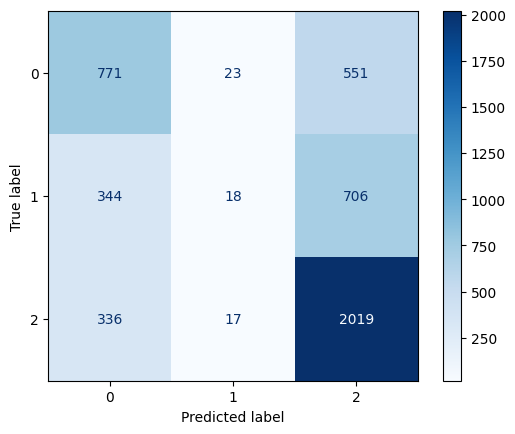

In [33]:
plot_confusion_matrix(lgbm, X_test, y_test, cmap='Blues')
plt.show()

# XGBClassifier

In [34]:
def objective(trial):
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'max_leaves': trial.suggest_int('max_leaves', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.1),
    }

    model = XGBClassifier(**param_grid)
    model.fit(X_train, y_train)
    
    return accuracy_score(y_test, model.predict(X_test))

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=20)

[I 2022-11-17 03:35:23,880] A new study created in memory with name: no-name-60e5a100-daf1-4226-bf87-df87169fbcaa
[I 2022-11-17 03:35:34,676] Trial 0 finished with value: 0.5732497387669802 and parameters: {'n_estimators': 192, 'max_depth': 11, 'max_leaves': 11, 'learning_rate': 0.06298133164856691}. Best is trial 0 with value: 0.5732497387669802.
[I 2022-11-17 03:35:36,300] Trial 1 finished with value: 0.5724137931034483 and parameters: {'n_estimators': 19, 'max_depth': 11, 'max_leaves': 12, 'learning_rate': 0.034032441968934776}. Best is trial 0 with value: 0.5732497387669802.
[I 2022-11-17 03:35:44,985] Trial 2 finished with value: 0.5788923719958202 and parameters: {'n_estimators': 273, 'max_depth': 7, 'max_leaves': 11, 'learning_rate': 0.08399425816713979}. Best is trial 2 with value: 0.5788923719958202.
[I 2022-11-17 03:35:52,989] Trial 3 finished with value: 0.5765935214211076 and parameters: {'n_estimators': 184, 'max_depth': 9, 'max_leaves': 13, 'learning_rate': 0.050656528246

In [35]:
xgb = XGBClassifier(**study_xgb.best_params, n_jobs=10)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.08025961641932929, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=275, n_jobs=10, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [36]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.58      0.55      1345
           1       0.23      0.01      0.02      1068
           2       0.62      0.85      0.71      2372

    accuracy                           0.59      4785
   macro avg       0.46      0.48      0.43      4785
weighted avg       0.51      0.59      0.51      4785



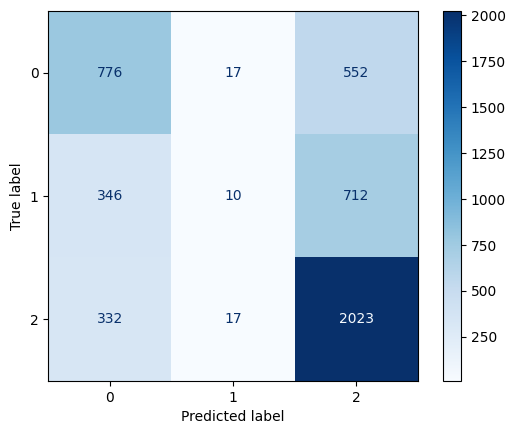

In [37]:
plot_confusion_matrix(xgb, X_test, y_test, cmap='Blues')
plt.show()

# CatBoost

In [38]:
cb = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=10,loss_function='MultiClass')
cb.fit(X_train, y_train)

0:	learn: 1.0641803	total: 97.1ms	remaining: 1m 37s
1:	learn: 1.0366175	total: 127ms	remaining: 1m 3s
2:	learn: 1.0151103	total: 155ms	remaining: 51.6s
3:	learn: 0.9964096	total: 183ms	remaining: 45.6s
4:	learn: 0.9812866	total: 212ms	remaining: 42.2s
5:	learn: 0.9682607	total: 242ms	remaining: 40.1s
6:	learn: 0.9570329	total: 270ms	remaining: 38.4s
7:	learn: 0.9476142	total: 298ms	remaining: 37s
8:	learn: 0.9397763	total: 329ms	remaining: 36.2s
9:	learn: 0.9333067	total: 358ms	remaining: 35.4s
10:	learn: 0.9271743	total: 386ms	remaining: 34.7s
11:	learn: 0.9221923	total: 414ms	remaining: 34.1s
12:	learn: 0.9175716	total: 443ms	remaining: 33.6s
13:	learn: 0.9137263	total: 472ms	remaining: 33.2s
14:	learn: 0.9097625	total: 500ms	remaining: 32.8s
15:	learn: 0.9058611	total: 530ms	remaining: 32.6s
16:	learn: 0.9030346	total: 559ms	remaining: 32.3s
17:	learn: 0.8997462	total: 589ms	remaining: 32.1s
18:	learn: 0.8972296	total: 618ms	remaining: 31.9s
19:	learn: 0.8943500	total: 647ms	remaini

In [39]:
print(classification_report(y_test, cb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.54      0.53      1345
           1       0.26      0.11      0.16      1068
           2       0.63      0.78      0.70      2372

    accuracy                           0.56      4785
   macro avg       0.47      0.48      0.46      4785
weighted avg       0.52      0.56      0.53      4785



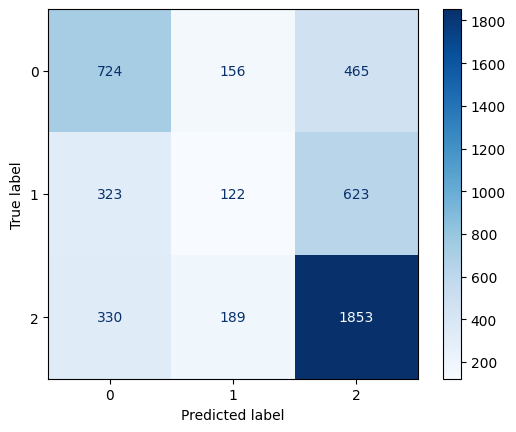

In [40]:
plot_confusion_matrix(cb, X_test, y_test, cmap='Blues')  
plt.show()

# Stacking

In [41]:
n_estimators = [('lm', lm), 
                ('knn', knn),
                ('rf', rf), 
                ('gb', gb), 
                ('lgbm', lgbm), 
                ('xgb', xgb), 
                ('cb', cb)]

sc = StackingClassifier(estimators=n_estimators, final_estimator=XGBClassifier(), n_jobs=4)
sc.fit(X_train, y_train)

/Users/aleksandrabudaeva/miniforge3/lib/python3.10/site-packages/catboost/core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 1.0641803	total: 113ms	remaining: 1m 52s
1:	learn: 1.0366175	total: 161ms	remaining: 1m 20s
2:	learn: 1.0151103	total: 208ms	remaining: 1m 9s
3:	learn: 0.9964096	total: 253ms	remaining: 1m 2s
4:	learn: 0.9812866	total: 295ms	remaining: 58.6s
5:	learn: 0.9682607	total: 341ms	remaining: 56.5s
6:	learn: 0.9570329	total: 383ms	remaining: 54.3s
7:	learn: 0.9476142	total: 425ms	remaining: 52.8s
8:	learn: 0.9397763	total: 466ms	remaining: 51.3s
9:	learn: 0.9333067	total: 505ms	remaining: 50s
10:	learn: 0.9271743	total: 546ms	remaining: 49.1s
11:	learn: 0.9221923	total: 590ms	remaining: 48.6s
12:	learn: 0.9175716	total: 635ms	remaining: 48.2s
13:	learn: 0.9137263	total: 679ms	remaining: 47.9s
14:	learn: 0.9097625	total: 724ms	remaining: 47.6s
15:	learn: 0.9058611	total: 768ms	remaining: 47.2s
16:	learn: 0.9030346	total: 812ms	remaining: 46.9s
17:	learn: 0.8997462	total: 853ms	remaining: 46.6s
18:	learn: 0.8972296	total: 896ms	remaining: 46.3s
19:	learn: 0.8943500	total: 936ms	remaini

/Users/aleksandrabudaeva/miniforge3/lib/python3.10/site-packages/catboost/core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 1.0653157	total: 148ms	remaining: 2m 27s
0:	learn: 1.0645296	total: 182ms	remaining: 3m 2s
0:	learn: 1.0657346	total: 198ms	remaining: 3m 18s
0:	learn: 1.0645169	total: 200ms	remaining: 3m 19s
1:	learn: 1.0380425	total: 281ms	remaining: 2m 20s
1:	learn: 1.0392686	total: 334ms	remaining: 2m 46s
1:	learn: 1.0380784	total: 347ms	remaining: 2m 53s
1:	learn: 1.0380740	total: 350ms	remaining: 2m 54s
2:	learn: 1.0170387	total: 400ms	remaining: 2m 12s
2:	learn: 1.0166397	total: 501ms	remaining: 2m 46s
2:	learn: 1.0181919	total: 535ms	remaining: 2m 57s
2:	learn: 1.0166296	total: 534ms	remaining: 2m 57s
3:	learn: 0.9992106	total: 567ms	remaining: 2m 21s
3:	learn: 0.9976988	total: 608ms	remaining: 2m 31s
3:	learn: 0.9990127	total: 629ms	remaining: 2m 36s
3:	learn: 0.9977605	total: 708ms	remaining: 2m 56s
4:	learn: 0.9838129	total: 724ms	remaining: 2m 24s
4:	learn: 0.9833717	total: 755ms	remaining: 2m 30s
4:	learn: 0.9825634	total: 751ms	remaining: 2m 29s
5:	learn: 0.9702683	total: 804ms

StackingClassifier(estimators=[('lm',
                                LogisticRegression(multi_class='multinomial',
                                                   n_jobs=4, solver='newton-cg',
                                                   warm_start=True)),
                               ('knn',
                                KNeighborsClassifier(algorithm='ball_tree',
                                                     n_neighbors=10)),
                               ('rf',
                                RandomForestClassifier(criterion='log_loss',
                                                       max_depth=10,
                                                       n_estimators=696,
                                                       n_jobs=10,
                                                       random_state=42,
                                                       warm_start=True)),
                               ('gb',
                                GradientBoostingClassifie...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None,
                                                 reg_alpha=None,
                                                 reg_lambda=None, ...),
                   n_jobs=4)

In [42]:
print(classification_report(y_test, sc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.52      0.55      0.53      1345
           1       0.25      0.06      0.09      1068
           2       0.61      0.81      0.70      2372

    accuracy                           0.57      4785
   macro avg       0.46      0.47      0.44      4785
weighted avg       0.50      0.57      0.52      4785



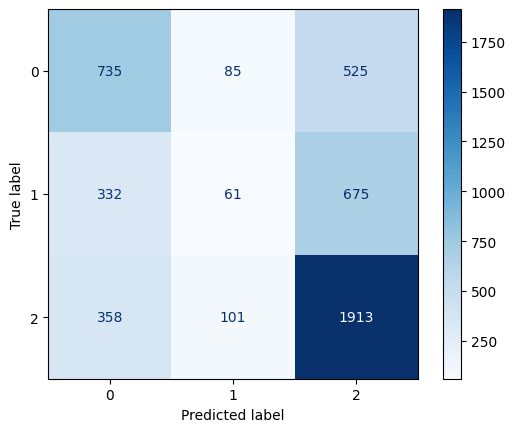

In [43]:
plot_confusion_matrix(sc, X_test, y_test, cmap='Blues')
plt.show()

# NN

In [44]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader, random_split

from torchsummary import summary

from tqdm.notebook import tqdm

import torchvision.transforms as T
import torch.nn.functional as F
from torchvision.utils import make_grid
from torchvision.models import resnet50, ResNet50_Weights

from copy import deepcopy

In [45]:
n_features=X.shape[1]

In [46]:
dataset = TensorDataset(torch.Tensor(X.to_numpy()), 
                        torch.Tensor(y.to_numpy()))

In [47]:
train_ds, valid_ds = random_split(dataset, (X.shape[0]-4000, 4000))

In [48]:
train_loader = DataLoader(train_ds, shuffle=True, batch_size=64)
valid_loader = DataLoader(valid_ds, shuffle=True, batch_size=64)

In [49]:
def plot_loss_metrics(tl: list, vl: list, tm: list, vm: list):

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    ax[0].plot(tl, label='Train loss')
    ax[0].plot(vl, label='Valid Loss')
    ax[0].legend()
    ax[0].set_title('Loss')

    ax[1].plot(tm, label='Train accuracy')
    ax[1].plot(vm, label='Valid accuracy')
    ax[1].legend()
    ax[1].set_title('Accuracy')

In [54]:
model2 = nn.Sequential(
    nn.Linear(n_features, 9),
    nn.Linear(9, 9),
    nn.Linear(9, 3),
    nn.Softmax(dim=1),
)

summary(model2, (n_features, ), batch_size=128)
history2 = None

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [128, 9]             360
            Linear-2                   [128, 9]              90
            Linear-3                   [128, 3]              30
           Softmax-4                   [128, 3]               0
Total params: 480
Trainable params: 480
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [55]:
def train_model2(model, epochs, history=None):
    history = history or {
        'train_accs': [],
        'train_losses': [],
        'test_accs': [],
        'test_losses': [],
    }
    
    max_acc = 0
    
    start_epoch = len(history['train_accs'])
    for epoch in range(start_epoch+1, start_epoch+epochs+1):
        # print(f'{"-"*13} Epoch {epoch} {"-"*13}')
        print('=', end='')
        
        model.train()
        batch_accs = []
        batch_losses = [] 
        for x_train_batch, y_train_batch in train_loader: 
            y_train_batch = y_train_batch.type(torch.LongTensor)
            y_pred = model(x_train_batch)
            loss = criterion(y_pred, y_train_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())
            batch_accs.append((y_pred.argmax(axis=1) == y_train_batch).numpy().mean())
            
        history['train_accs'].append(np.mean(batch_accs))
        history['train_losses'].append(np.mean(batch_losses))

        # Validation
        model.eval()
    
        batch_accs = []
        batch_losses = []
        for x_test_batch, y_test_batch in valid_loader:
            y_test_batch = y_test_batch.type(torch.LongTensor)
            y_pred = model(x_test_batch)
            loss = criterion(y_pred, y_test_batch)
            
            batch_losses.append(loss.item())
            batch_accs.append((y_pred.argmax(axis=1) == y_test_batch).numpy().mean())
            
        history['test_accs'].append(np.mean(batch_accs))
        history['test_losses'].append(np.mean(batch_losses))
        
        if np.mean(batch_losses) > max_acc:
            max_acc = np.mean(batch_losses)
            best_model = deepcopy(model)
    print('100%')                            
    return history

In [56]:
optimizer = optim.Adagrad(model2.parameters(), lr=0.001)
# optimizer = optim.SGD(model.parameters(), lr=0.01) 
criterion = nn.CrossEntropyLoss()

In [61]:
history2 = train_model2(model2, 300, history2)

============================================================================================================================================================================================================================================================================================================100%


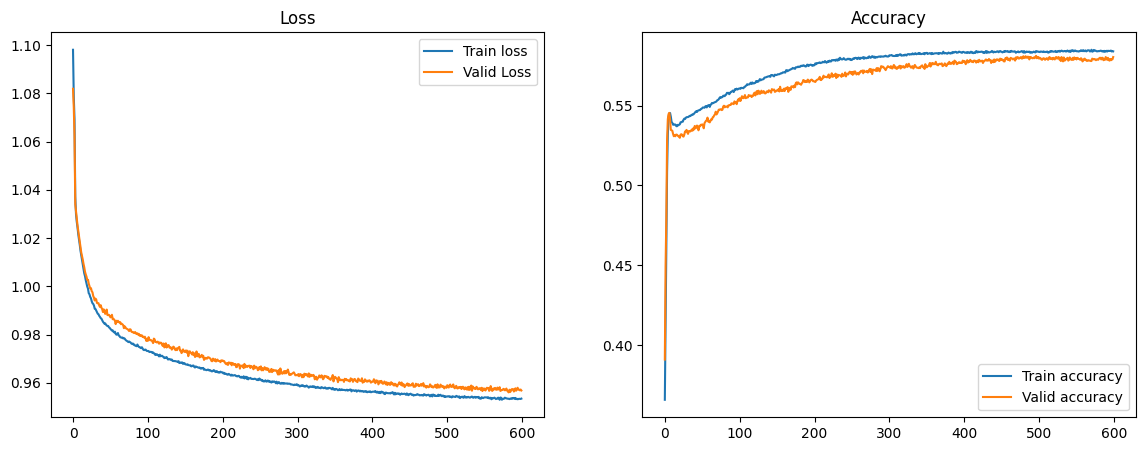

In [62]:
plot_loss_metrics(history2['train_losses'], history2['test_losses'], history2['train_accs'], history2['test_accs'])

In [63]:
model2.eval()
pred2 = model2(valid_ds.dataset.tensors[0]).argmax(axis=1)

confusion_matrix(valid_ds.dataset.tensors[1].tolist(), pred2.tolist())

array([[ 3725,     4,  3042],
       [ 1651,     4,  3734],
       [ 1531,     5, 10225]])

In [64]:
print(classification_report(valid_ds.dataset.tensors[1].tolist(), pred2.tolist()))

              precision    recall  f1-score   support

         0.0       0.54      0.55      0.54      6771
         1.0       0.31      0.00      0.00      5389
         2.0       0.60      0.87      0.71     11761

    accuracy                           0.58     23921
   macro avg       0.48      0.47      0.42     23921
weighted avg       0.52      0.58      0.50     23921



# Predicting

In [81]:
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

In [82]:
teams = [['Qatar', 'Ecuador', 'Senegal', 'Netherlands'], 
         ['England', 'Iran', 'USA', 'Wales'], 
         ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland'], 
         ['France', 'Australia', 'Denmark', 'Tunisia'], 
         ['Spain', 'Costa Rica', 'Germany', 'Japan'], 
         ['Belgium', 'Canada', 'Morocco', 'Croatia'],
         ['Brazil', 'Serbia', 'Switzerland', 'Cameroon'], 
         ['Portugal', 'Ghana', 'Uruguay', 'South Korea']]

df_2['date'] = df_2.index
cols_home = ['home_team', 'date']+[col for col in X if col.startswith('home_')]
cols_away = ['away_team', 'date']+[col for col in X if col.startswith('away_')]
home = df_2[cols_home].loc[df_2['home_team'].isin(sum(teams, []))]
away = df_2[cols_away].loc[df_2['away_team'].isin(sum(teams, []))]
home = home.groupby('home_team').agg(['last']).reset_index()
away = away.groupby('away_team').agg(['last']).reset_index()
home.columns = cols_home
away.columns = cols_home
team_data = pd.concat([home, away])
team_data.index = team_data['date']
team_data = team_data.groupby('home_team').agg(['last']).reset_index()
team_data.columns = cols_home
team_data['date'] = 2022

In [83]:
test=None
for group in teams:
    for team in combinations(group, 2):
        row1 = team_data.loc[team_data.home_team==team[0]].reset_index(drop=True)
        row1.columns = cols_home
        row1 = row1.drop('date', axis=1)
        row2 = team_data.loc[team_data.home_team==team[1]].reset_index(drop=True)
        row2.columns = cols_away
        row2 = row2.drop('date', axis=1)
        row = pd.concat([row1, row2], axis=1)
        row = row.reindex(['home_team', 'away_team']+X.columns.tolist(), axis=1)
        
        row['date'] = 2022
        row['dif_rank'] = row.home_team_fifa_rank-row.away_team_fifa_rank
        row['dif_points'] = row.home_team_total_fifa_points-row.away_team_total_fifa_points
        row['dif_goalkeeper'] = row.home_team_goalkeeper_score-row.away_team_goalkeeper_score
        row['dif_defense'] = row.home_team_mean_defense_score-row.away_team_mean_defense_score
        row['dif_offense'] = row.home_team_mean_offense_score-row.away_team_mean_offense_score
        row['dif_midfield'] = row.home_team_mean_midfield_score-row.away_team_mean_midfield_score

        row['ave_rank'] = (row.home_team_fifa_rank+row.away_team_fifa_rank)/2
        row['ave_points'] = (row.home_team_total_fifa_points+row.away_team_total_fifa_points)/2
        row['ave_goalkeeper'] = (row.home_team_goalkeeper_score+row.away_team_goalkeeper_score)/2
        row['ave_defense'] = (row.home_team_mean_defense_score+row.away_team_mean_defense_score)/2
        row['ave_offense'] = (row.home_team_mean_offense_score+row.away_team_mean_offense_score)/2
        row['ave_midfield'] = (row.home_team_mean_midfield_score+row.away_team_mean_midfield_score)/2

        row['neutral_location'] = 0
        row['shoot_out'] = 0
        
        test = pd.concat([test, row], axis=0)

In [84]:
test = test.reset_index(drop=True)

In [85]:
test_ml = pd.DataFrame(scaler.transform(test.drop(['home_team', 'away_team'], axis=1)), 
                       columns = test.drop(['home_team', 'away_team'], axis=1).columns)

In [86]:
predicted = pd.concat([test.home_team, test.away_team,
                       pd.DataFrame(lm.predict_proba(test_ml), columns=['lm_away', 'lm_draw', 'lm_home']),
                       pd.DataFrame(knn.predict_proba(test_ml), columns=['knn_away', 'knn_draw', 'knn_home']),
                       pd.DataFrame(rf.predict_proba(test_ml), columns=['rf_away', 'rf_draw', 'rf_home']),
                       pd.DataFrame(gb.predict_proba(test_ml), columns=['gb_away', 'gb_draw', 'gb_home']),
                       pd.DataFrame(lgbm.predict_proba(test_ml), columns=['lgbm_away', 'lgbm_draw', 'lgbm_home']),
                       pd.DataFrame(xgb.predict_proba(test_ml), columns=['xgb_away', 'xgb_draw', 'xgb_home']),
                       pd.DataFrame(cb.predict_proba(test_ml), columns=['cb_away', 'cb_draw', 'cb_home']),
                       pd.DataFrame(sc.predict_proba(test_ml), columns=['sc_away', 'sc_draw', 'sc_home'])], axis=1)

In [87]:
test_nn = TensorDataset(torch.Tensor(test_ml.to_numpy()))

In [88]:
model2.eval()
pred2 = model2(test_nn.tensors[0])

In [89]:
predicted = pd.concat([predicted, pd.DataFrame(pred2.detach().numpy(), columns=['nn_away', 'nn_draw', 'nn_home'])], axis=1)

In [90]:
predicted.columns

Index(['home_team', 'away_team', 'lm_away', 'lm_draw', 'lm_home', 'knn_away',
       'knn_draw', 'knn_home', 'rf_away', 'rf_draw', 'rf_home', 'gb_away',
       'gb_draw', 'gb_home', 'lgbm_away', 'lgbm_draw', 'lgbm_home', 'xgb_away',
       'xgb_draw', 'xgb_home', 'cb_away', 'cb_draw', 'cb_home', 'sc_away',
       'sc_draw', 'sc_home', 'nn_away', 'nn_draw', 'nn_home'],
      dtype='object')

In [91]:
predicted['mean_away'] = predicted[['lm_away', 
                                    'knn_away', 
                                    'rf_away', 
                                    'gb_away', 
                                    'lgbm_away', 
                                    'xgb_away', 
                                    'cb_away',
                                    'sc_away',
                                    'nn_away']].mean(axis=1)

In [92]:
predicted['mean_draw'] = predicted[['lm_draw', 
                                    'knn_draw', 
                                    'rf_draw', 
                                    'gb_draw', 
                                    'lgbm_draw', 
                                    'xgb_draw', 
                                    'cb_draw',
                                    'sc_draw',
                                    'nn_draw']].mean(axis=1)

In [93]:
predicted['mean_home'] = predicted[['lm_home', 
                                    'knn_home', 
                                    'rf_home', 
                                    'gb_home', 
                                    'lgbm_home', 
                                    'xgb_home', 
                                    'cb_home',
                                    'sc_home',
                                    'nn_home']].mean(axis=1)

In [ ]:
pwd

In [94]:
predicted.to_csv('~/DS_bootcamp/stavki/data/ratings/predicted3.csv')